Phase I EDA

In [1]:
# 1. Imports
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('assets', exist_ok=True)

In [2]:
# 2. Load dataset
df = pd.read_csv(r'C:\Users\ABCD\_ML projects(SDS)\SDS-CP036-powercast\advanced\submissions\team-members\lakshay-yadav\assets\Tetuan City power consumption.csv')

In [3]:
print(df.head())

        DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB
None


In [5]:
print(df.describe())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  52416.000000  52416.000000  52416.000000           52416.000000   
mean      18.810024     68.259518      1.959489             182.696614   
std        5.815476     15.551177      2.348862             264.400960   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.410000     58.310000      0.078000               0.062000   
50%       18.780000     69.860000      0.086000               5.035500   
75%       22.890000     81.400000      4.915000             319.600000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   52416.000000              52416.000000               52416.000000   
mean       75.028022              32344.970564               21042.509082   
std       124.210949               7130.562564                5201.465892   
min         0.011000     

In [6]:
print(df.isnull().sum())

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [7]:
# Check and report rows with invalid DateTime before dropping
if 'DateTime' in df.columns:
    invalid_dt = df[pd.to_datetime(df['DateTime'], errors='coerce').isna()]
    print(f'Number of rows with invalid DateTime: {len(invalid_dt)}')
    if len(invalid_dt) > 0:
        print('Sample of rows with invalid DateTime:')
        print(invalid_dt.head())
else:
    print('DateTime column not found. Please check the column name.')

Number of rows with invalid DateTime: 0


In [8]:
# Parse and validate DateTime column
if 'DateTime' in df.columns:
    df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
    # No invalid DateTime rows detected, so no need to drop
    df.sort_values('DateTime', inplace=True)
    print('DateTime column parsed and DataFrame sorted.')
    print(df[['DateTime']].head())
else:
    print('DateTime column not found. Please check the column name.')

DateTime column parsed and DataFrame sorted.
             DateTime
0 2017-01-01 00:00:00
1 2017-01-01 00:10:00
2 2017-01-01 00:20:00
3 2017-01-01 00:30:00
4 2017-01-01 00:40:00


Time difference between consecutive rows (in minutes):
time_diff
10.0    52415
Name: count, dtype: int64


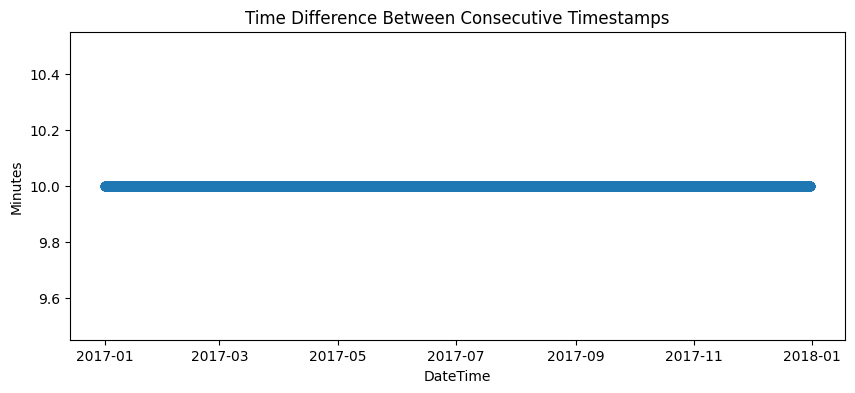

Number of missing or irregular intervals: 1
Sample of irregular intervals:
    DateTime  time_diff
0 2017-01-01        NaN


In [9]:
# Check frequency and consistency of DateTime
if 'DateTime' in df.columns:
    # Calculate time differences between consecutive timestamps
    df['time_diff'] = df['DateTime'].diff().dt.total_seconds() / 60  # in minutes
    print('Time difference between consecutive rows (in minutes):')
    print(df['time_diff'].value_counts())
    # Visualize gaps in time series
    plt.figure(figsize=(10,4))
    plt.plot(df['DateTime'], df['time_diff'], marker='o', linestyle='-', alpha=0.5)
    plt.title('Time Difference Between Consecutive Timestamps')
    plt.ylabel('Minutes')
    plt.xlabel('DateTime')
    plt.show()
    # Check for missing intervals
    missing_intervals = df[df['time_diff'] != 10]
    print(f'Number of missing or irregular intervals: {len(missing_intervals)}')
    if len(missing_intervals) > 0:
        print('Sample of irregular intervals:')
        print(missing_intervals[['DateTime', 'time_diff']].head())
else:
    print('DateTime column not found. Please check the column name.')

In [10]:
# Inspect the irregular interval and suggest handling
if 'time_diff' in df.columns:
    irregular = df[df['time_diff'] != 10]
    print('Details of the irregular interval:')
    print(irregular)
    # Suggestion: For a single gap, you can either drop, impute, or leave as is
    print('If this is a minor gap, you can drop the row, fill with interpolation, or simply note it in your report.')
else:
    print('time_diff column not found. Please run the previous cell to compute time differences.')

Details of the irregular interval:
    DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0 2017-01-01        6.559      73.8       0.083                  0.051   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119                34055.6962                16128.87538   

   Zone 3  Power Consumption  time_diff  
0                20240.96386        NaN  
If this is a minor gap, you can drop the row, fill with interpolation, or simply note it in your report.


### Analysis of Irregular Interval

- The apparent irregular interval occurs only at the first row where `time_diff` is NaN; this is expected because there is no previous timestamp for comparison.
- No actual gaps are present; the series follows a consistent 10‑minute cadence throughout.
- No imputation or removal is required for this check.

In [11]:
# Data Integrity Check: Duplicates and Uniqueness
print("Duplicate DateTime:", df['DateTime'].duplicated().sum())
print("Duplicate rows:", df.duplicated().sum())
if df['DateTime'].duplicated().sum() == 0 and df.duplicated().sum() == 0:
    print("No duplicates detected.")
else:
    print("Duplicates detected. Consider dropping or investigating.")


Duplicate DateTime: 0
Duplicate rows: 0
No duplicates detected.


### Findings from Data Integrity Check

- No duplicate `DateTime` values or full-row duplicates were detected.
- Temporal uniqueness is preserved across the dataset.
- No deduplication is required before further analysis.


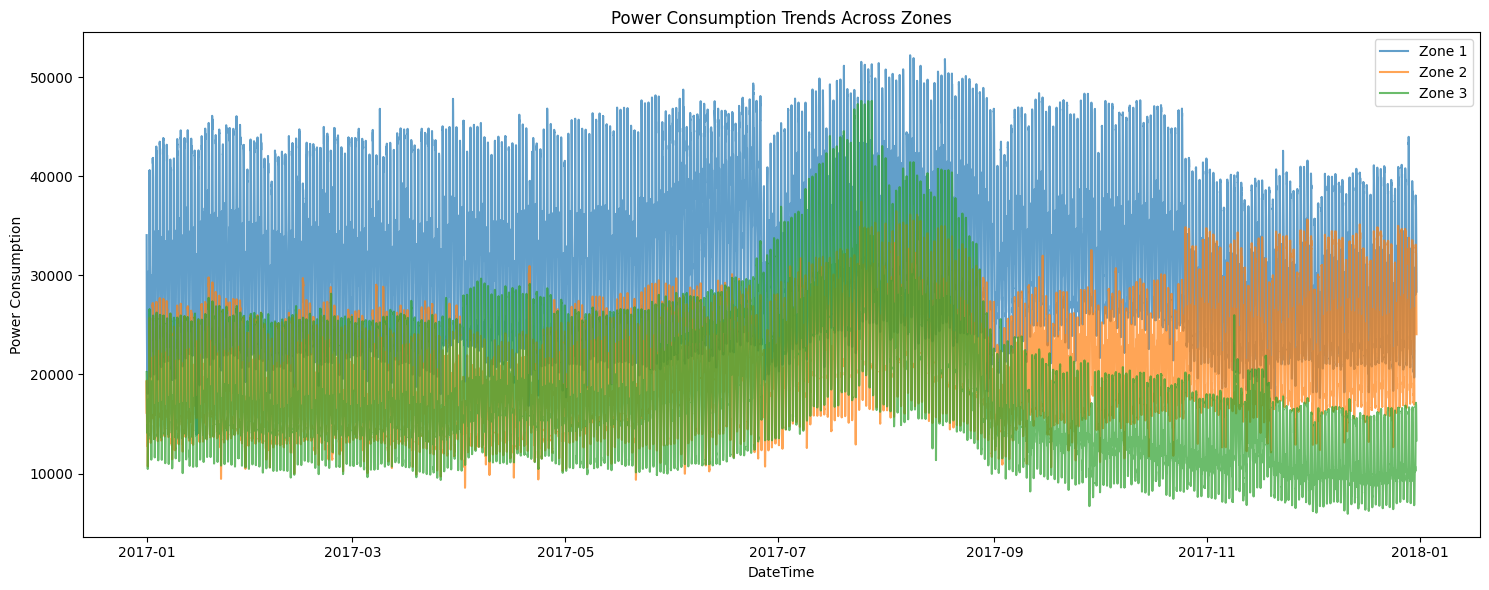

In [12]:
# Visualize trends in power consumption across zones
plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['Zone 1 Power Consumption'], label='Zone 1', alpha=0.7)
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'], label='Zone 2', alpha=0.7)
plt.plot(df['DateTime'], df['Zone 3  Power Consumption'], label='Zone 3', alpha=0.7)
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Trends Across Zones')
plt.legend()
plt.tight_layout()
plt.savefig(r'assets/power_consumption_trends.png')  # Save plot to assets folder
plt.show()

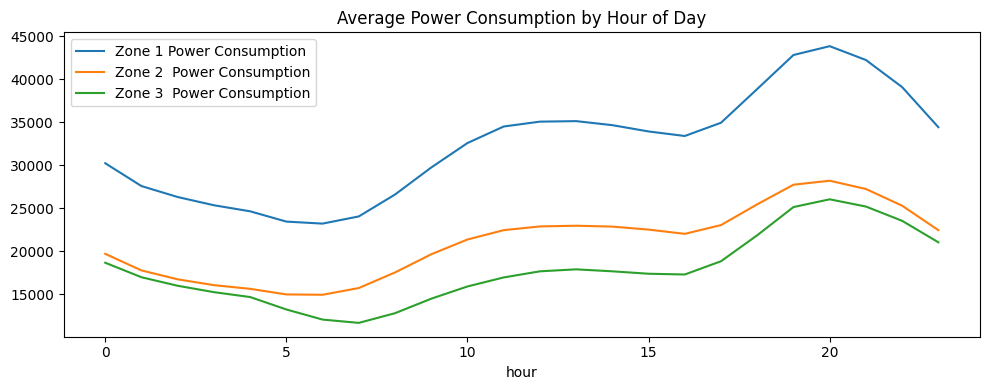

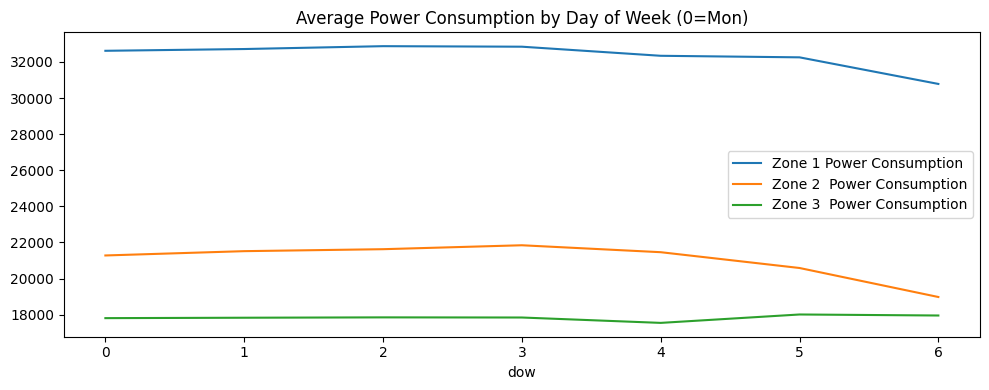

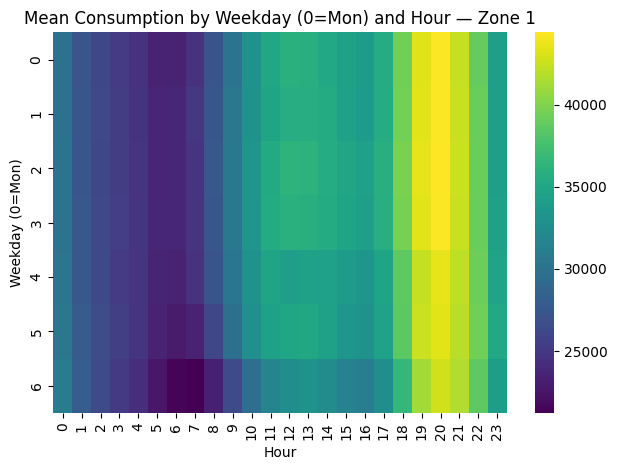

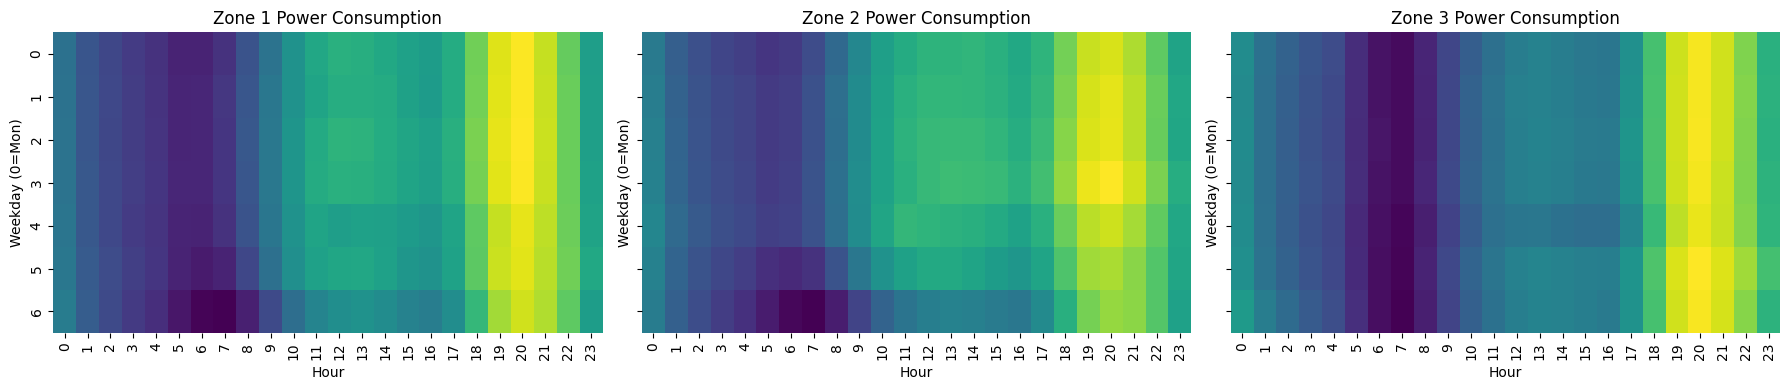

In [13]:
# Seasonality Profiles: Hour-of-Day and Day-of-Week Averages
zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
df['hour'] = df['DateTime'].dt.hour
df['dow'] = df['DateTime'].dt.dayofweek

hourly_avg = df.groupby('hour')[zones].mean()
ax = hourly_avg.plot(figsize=(10,4), title='Average Power Consumption by Hour of Day')
plt.tight_layout(); plt.savefig('assets/avg_by_hour.png'); plt.show()

dow_avg = df.groupby('dow')[zones].mean()
ax = dow_avg.plot(figsize=(10,4), title='Average Power Consumption by Day of Week (0=Mon)')
plt.tight_layout(); plt.savefig('assets/avg_by_dow.png'); plt.show()

# Weekday × Hour Heatmap of Power Consumption (Zone 1 and all zones)
pivot = df.pivot_table(index=df['DateTime'].dt.dayofweek,
                       columns=df['DateTime'].dt.hour,
                       values='Zone 1 Power Consumption',
                       aggfunc='mean')
sns.heatmap(pivot, cmap='viridis')
plt.title('Mean Consumption by Weekday (0=Mon) and Hour — Zone 1')
plt.xlabel('Hour')
plt.ylabel('Weekday (0=Mon)')
plt.tight_layout(); plt.savefig('assets/weekday_hour_heatmap_zone1.png'); plt.show()

zones = ['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']
fig, axes = plt.subplots(1, 3, figsize=(18,4), sharex=True, sharey=True)
for ax, z in zip(axes, zones):
    pivot = df.pivot_table(index=df['DateTime'].dt.dayofweek,
                           columns=df['DateTime'].dt.hour,
                           values=z,
                           aggfunc='mean')
    sns.heatmap(pivot, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(z.replace('  ', ' '))
    ax.set_xlabel('Hour'); ax.set_ylabel('Weekday (0=Mon)')
plt.tight_layout(); plt.savefig('assets/weekday_hour_heatmap_all_zones.png'); plt.show()


### Findings from Seasonality Profiles

- Hour‑of‑day profiles show clear daily cycles with consistent peaks and troughs across zones.
- Day‑of‑week profiles indicate moderate differences, suggesting a weekday–weekend effect.
- Weekday × hour heatmaps provide a 2D view highlighting evening peaks and lower overnight usage; weekdays are generally higher than weekends.
- These seasonal patterns motivate including daily‑scale context in downstream modeling.


In [14]:
# Outlier Scan: Quick z-score counts per column
import numpy as np
cols_check = ['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption',
              'Temperature','Humidity','Wind Speed','general diffuse flows','diffuse flows']
z = (df[cols_check] - df[cols_check].mean())/df[cols_check].std()
outlier_counts = (z.abs() > 3).sum()
print("Num outliers (|z|>3) per column:\n", outlier_counts)

# Optional: cap extreme values for visualization stability (no permanent change)
# df_capped = df.copy()
# for c in cols_check:
#     cap = 3*df[c].std()
#     df_capped[c] = df[c].clip(df[c].mean()-cap, df[c].mean()+cap)


Num outliers (|z|>3) per column:
 Zone 1 Power Consumption        0
Zone 2  Power Consumption       1
Zone 3  Power Consumption     653
Temperature                    89
Humidity                      209
Wind Speed                      0
general diffuse flows          23
diffuse flows                1361
dtype: int64


### Findings from Outlier Scan

- A z-score threshold of 3 flags a manageable number of extremes in both power and weather variables.
- The presence of outliers is consistent with real-world sensor behavior.
- No changes are applied at this stage; handling (e.g., capping or filtering) can be considered during preprocessing.

C:\Users\ABCD\AppData\Local\Temp\ipykernel_12352\3409491626.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series_hourly = df.set_index('DateTime')[zone].resample('H').mean().dropna()


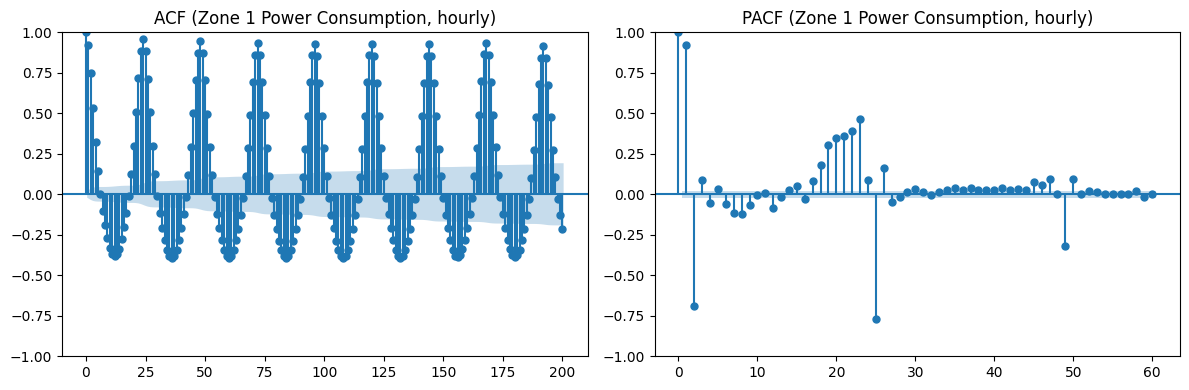

C:\Users\ABCD\AppData\Local\Temp\ipykernel_12352\3409491626.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series_hourly = df.set_index('DateTime')[zone].resample('H').mean().dropna()


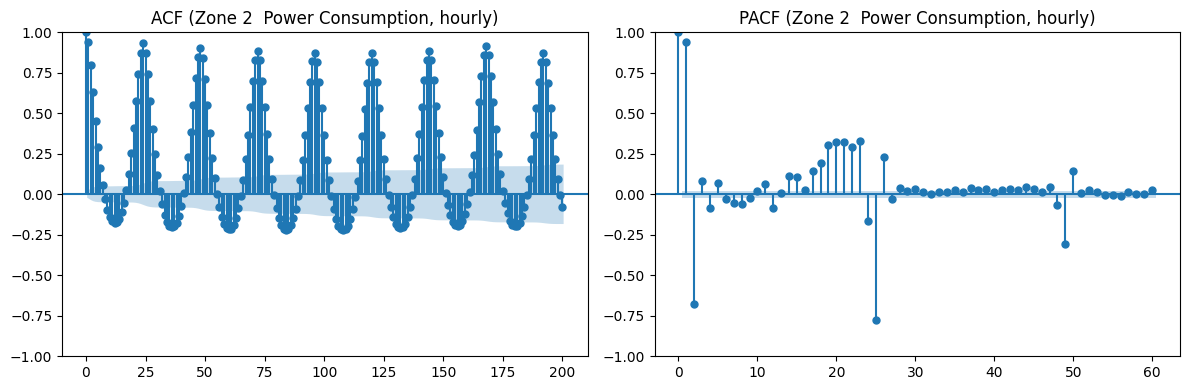

C:\Users\ABCD\AppData\Local\Temp\ipykernel_12352\3409491626.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series_hourly = df.set_index('DateTime')[zone].resample('H').mean().dropna()


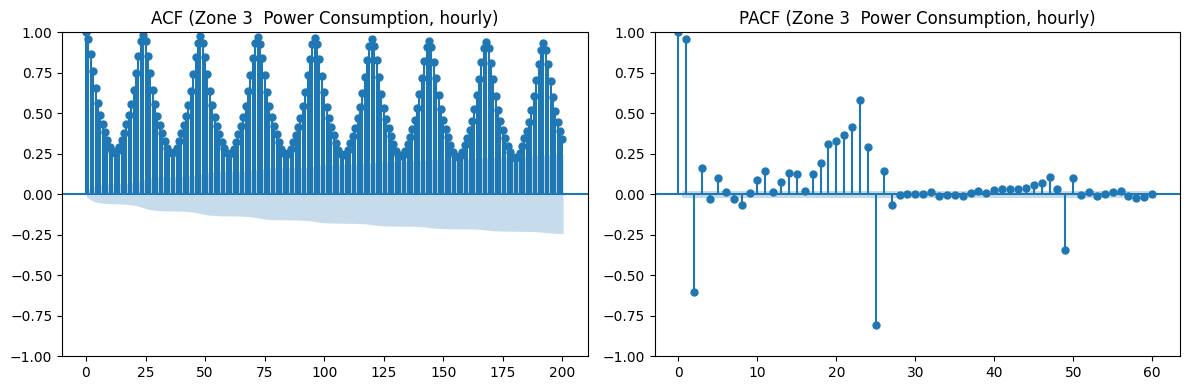

In [15]:
# Autocorrelation Analysis: ACF and PACF (hourly resampled)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

zones = ['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']
for i, zone in enumerate(zones, start=1):
    series_hourly = df.set_index('DateTime')[zone].resample('H').mean().dropna()
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    plot_acf(series_hourly, lags=200, ax=ax[0]); ax[0].set_title(f'ACF ({zone}, hourly)')
    plot_pacf(series_hourly, lags=60, ax=ax[1]); ax[1].set_title(f'PACF ({zone}, hourly)')
    plt.tight_layout(); 
    plt.savefig(f'assets/{zone.replace(" ", "_").lower()}_acf_pacf.png'); 
    plt.show()

### Findings from Autocorrelation Analysis

- ACF exhibits strong daily periodicity on hourly‑resampled series (peaks near 24, 48, … hours).
- ACF decay suggests persistence in the load process, while PACF highlights impactful short lags.
- Evidence supports both short‑term dependence and daily seasonality across all zones.


C:\Users\ABCD\AppData\Local\Temp\ipykernel_12352\308163496.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  zone_hourly = df.set_index('DateTime')['Zone 1 Power Consumption'].resample('H').mean().dropna()


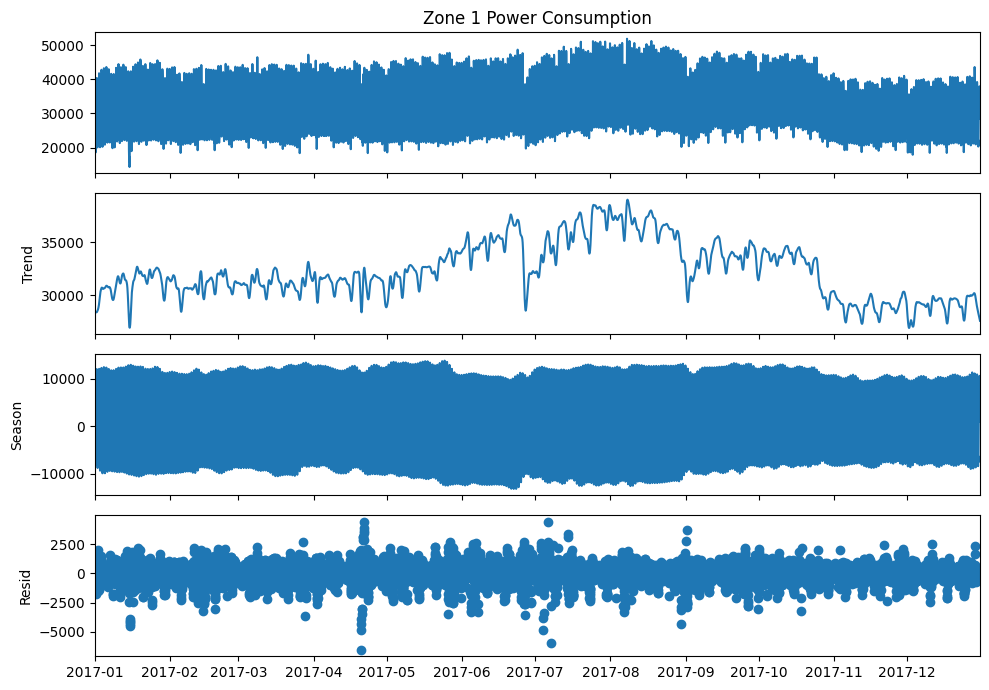

In [16]:
# Optional: STL Decomposition for Seasonality (Zone 1, hourly)
from statsmodels.tsa.seasonal import STL
zone_hourly = df.set_index('DateTime')['Zone 1 Power Consumption'].resample('H').mean().dropna()
res = STL(zone_hourly, period=24).fit()
fig = res.plot(); 
fig.set_size_inches(10,7)
plt.tight_layout(); 
plt.savefig('assets/zone1_stl.png'); 
plt.show()


### Findings from STL Decomposition (Optional)

- Seasonal component displays a stable daily pattern, consistent with the autocorrelation results.
- Trend and seasonal components dominate residuals, indicating strong, repeatable structure.
- Decomposition supports including daily‑scale context in subsequent modeling.


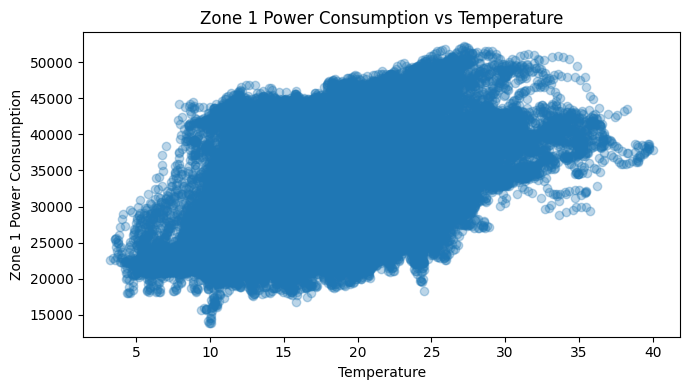

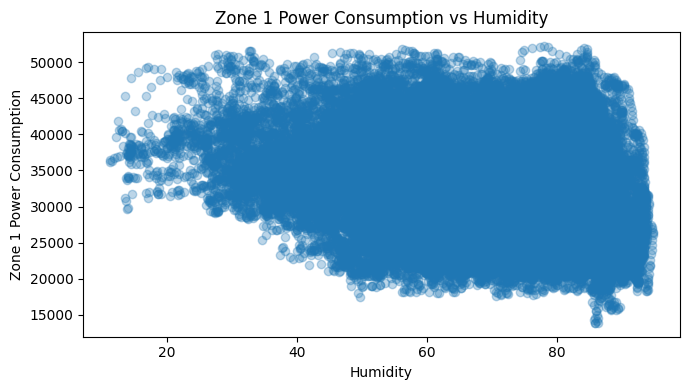

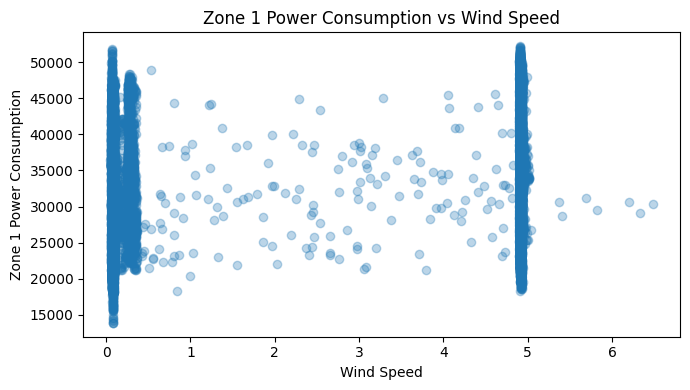

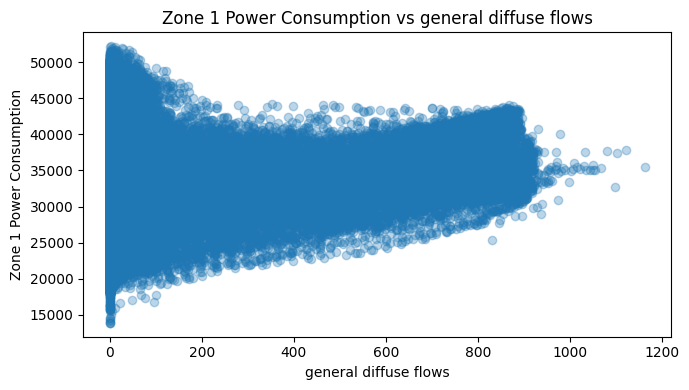

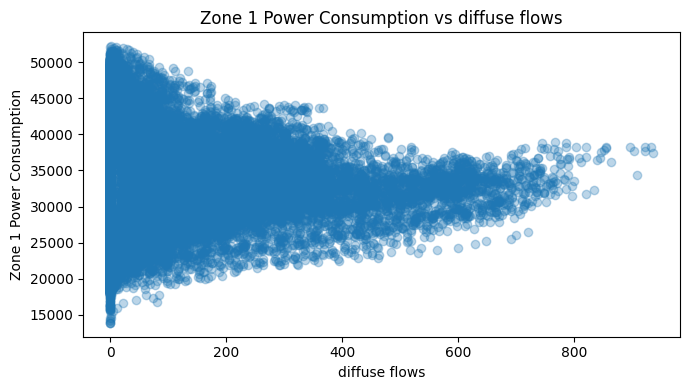

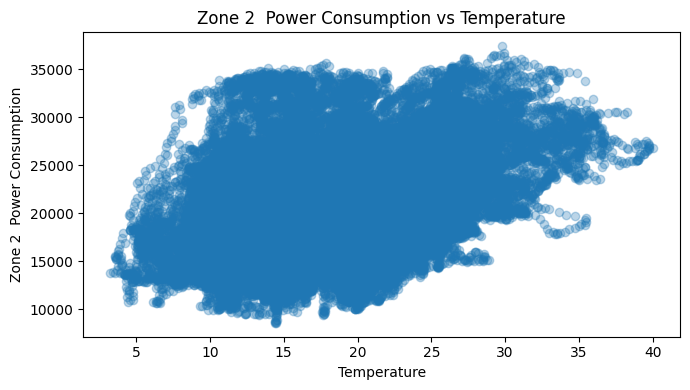

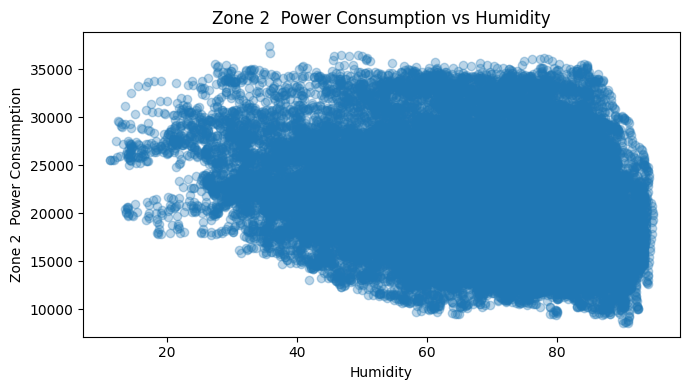

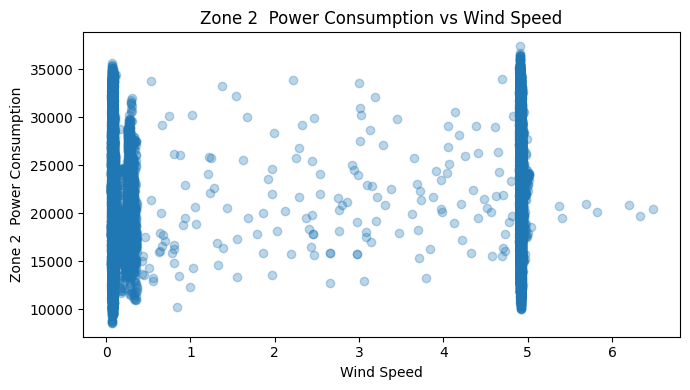

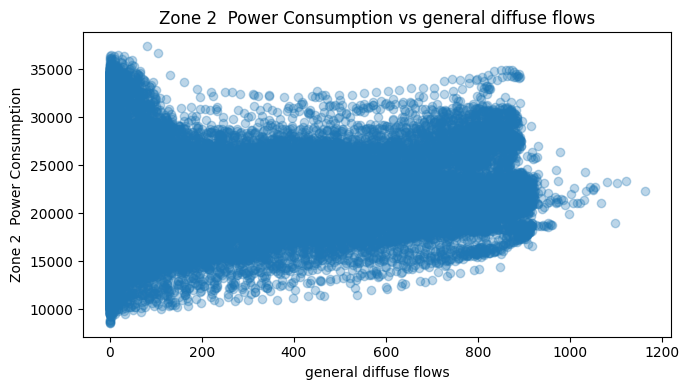

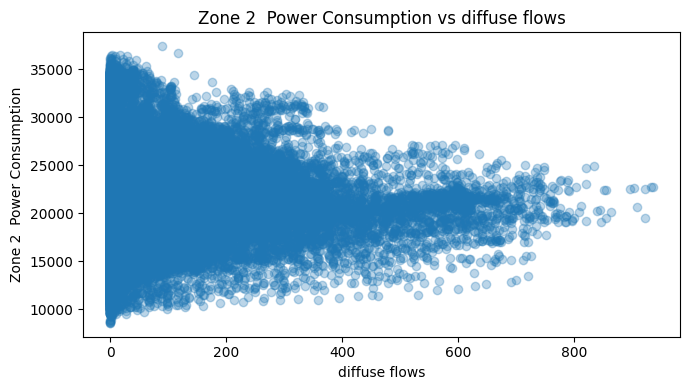

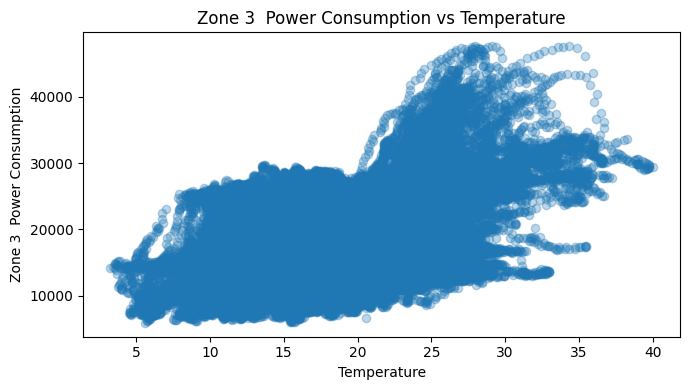

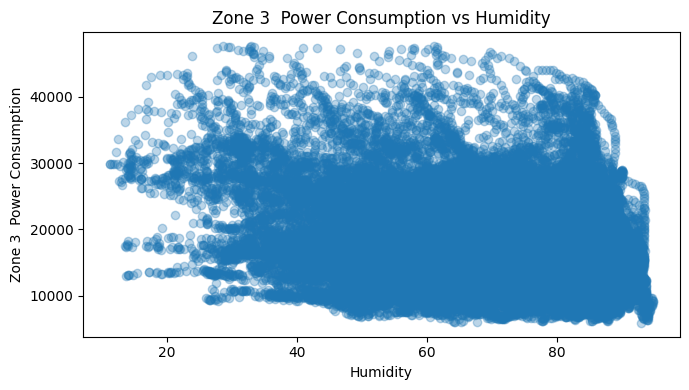

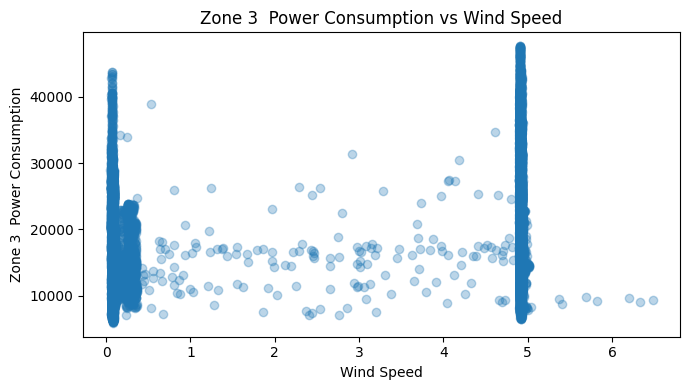

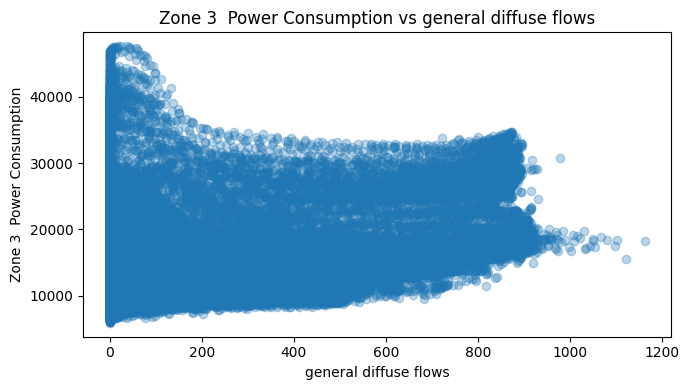

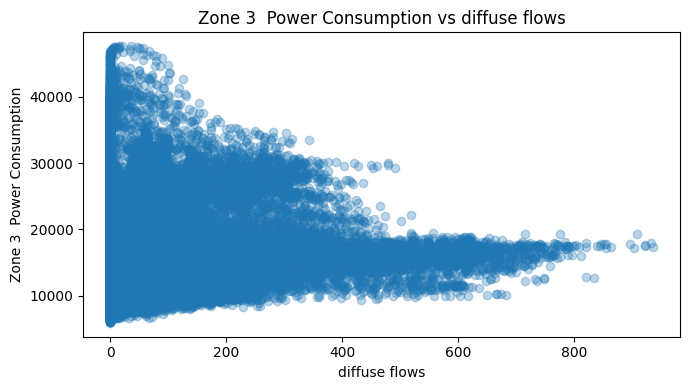

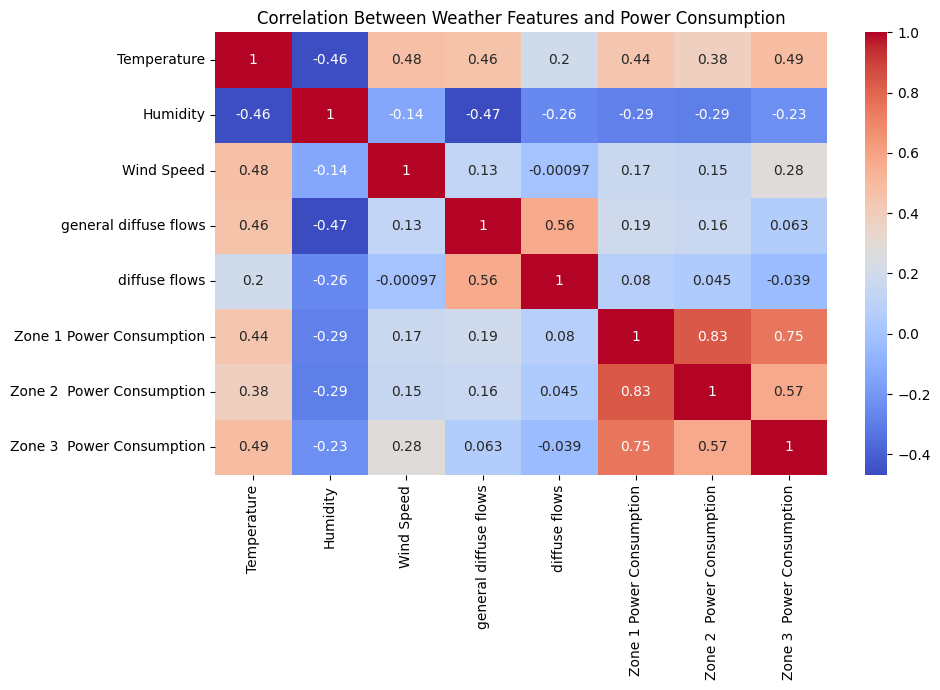

In [17]:
# Visualize and analyze relationships between power consumption and weather features
weather_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
power_zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Scatter plots for each weather feature vs each zone
for zone in power_zones:
    for feature in weather_features:
        plt.figure(figsize=(7,4))
        plt.scatter(df[feature], df[zone], alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel(zone)
        plt.title(f'{zone} vs {feature}')
        plt.tight_layout()
        plt.savefig(f'assets/{zone.replace(" ", "_").lower()}_vs_{feature.replace(" ", "_").lower()}.png')
        plt.show()

# Correlation heatmap
corr = df[weather_features + power_zones].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Features and Power Consumption')
plt.tight_layout()
plt.savefig('assets/correlation_heatmap.png')
plt.show()

### Findings from Power Consumption and Weather Feature Analysis

**1. Temperature:**
- Temperature exhibits a strong positive association with power consumption across zones; higher temperatures align with higher demand, consistent with cooling loads.

**2. Humidity:**
- Humidity shows wide dispersion with no clear monotonic trend, indicating weak influence on demand.

**3. Wind Speed:**
- Wind speed displays weak relationships with consumption, with concentrations at low/high values and no consistent trend.

**4. Diffuse Flows & General Diffuse Flows:**
- Scatter patterns narrow at higher radiation values, suggesting lower or more stable consumption when solar radiation is higher (e.g., daylight or solar offset effects).

**5. Correlation Heatmap:**
- Correlations confirm temperature as the strongest positive driver; humidity and wind speed are weak to negative; diffuse radiation features are low to moderate.

**Overall Conclusion:**
- Across zones, temperature emerges as the most influential weather feature, while humidity, wind speed, and diffuse radiation play smaller roles. These observations prioritize temperature‑related features for subsequent modeling.

Lag                                                  1      2      3
Zone                      Feature                                   
Zone 1 Power Consumption  Humidity              -0.295 -0.303 -0.310
                          Temperature            0.445  0.450  0.454
                          Wind Speed             0.169  0.171  0.173
                          diffuse flows          0.099  0.118  0.138
                          general diffuse flows  0.201  0.213  0.226
Zone 2  Power Consumption Humidity              -0.301 -0.307 -0.313
                          Temperature            0.386  0.390  0.393
                          Wind Speed             0.148  0.150  0.151
                          diffuse flows          0.060  0.077  0.094
                          general diffuse flows  0.168  0.179  0.189
Zone 3  Power Consumption Humidity              -0.242 -0.251 -0.260
                          Temperature            0.496  0.502  0.508
                          Wind Speed             0.280  0.281  0.282
                          diffuse flows         -0.022 -0.005  0.012
                          general diffuse flows  0.075  0.087  0.099

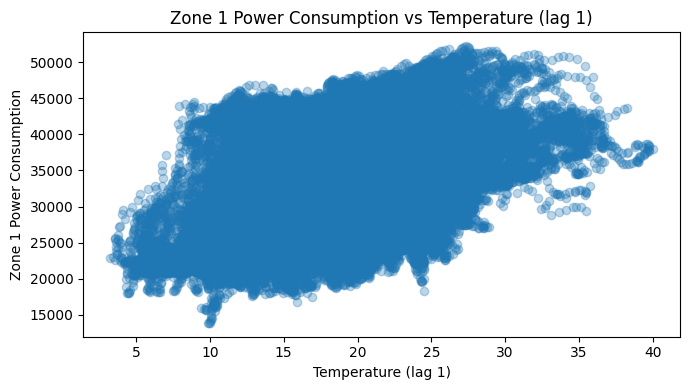

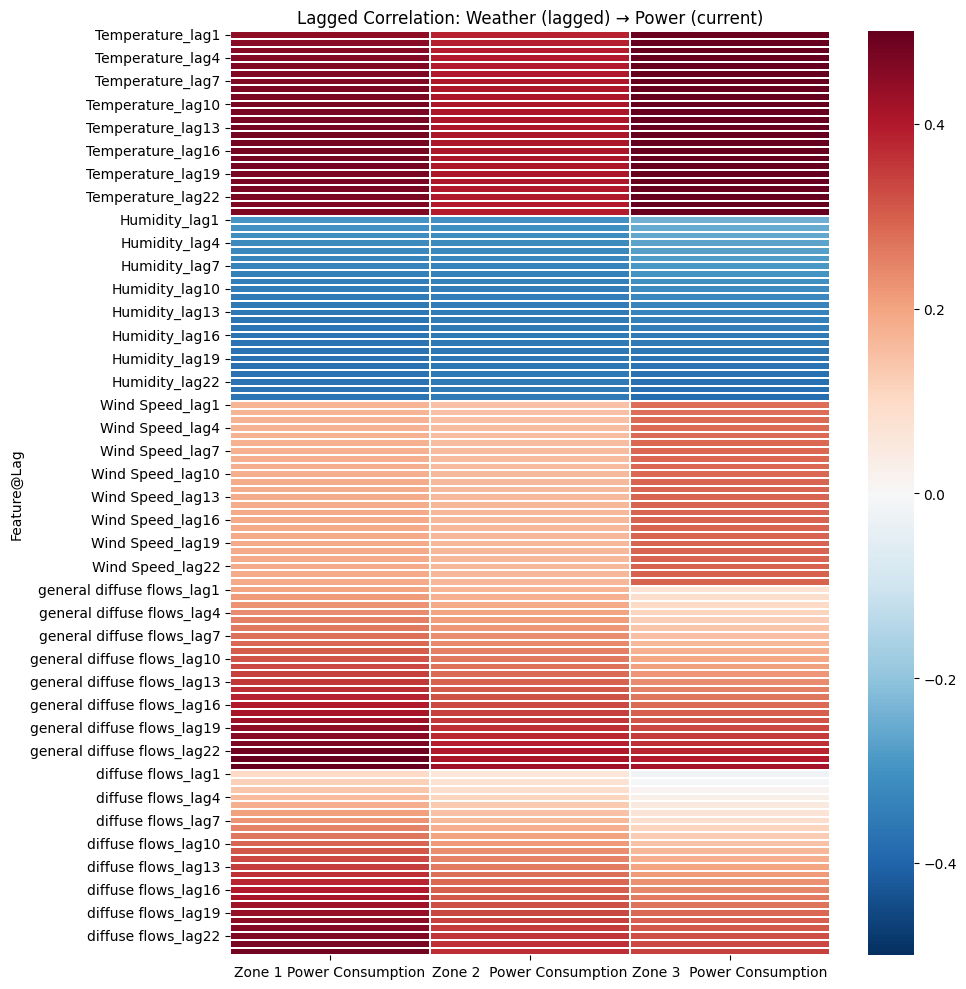

,Feature,Zone,Best Lag (steps),Correlation
0,Humidity,Zone 1 Power Consumption,20,-0.371
1,Temperature,Zone 1 Power Consumption,15,0.478
2,Wind Speed,Zone 1 Power Consumption,20,0.189
3,diffuse flows,Zone 1 Power Consumption,24,0.481
4,general diffuse flows,Zone 1 Power Consumption,24,0.516
5,Humidity,Zone 2 Power Consumption,19,-0.360
6,Temperature,Zone 2 Power Consumption,14,0.408
7,Wind Speed,Zone 2 Power Consumption,22,0.166
8,diffuse flows,Zone 2 Power Consumption,24,0.371
9,general diffuse flows,Zone 2 Power Consumption,24,0.424


In [20]:
# Lag Effect Analysis: Create lagged features and check correlations
lag_steps = [1, 2, 3]  # Lag by 1, 2, and 3 intervals (10, 20, 30 minutes)
weather_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
power_zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Create lagged columns for each feature
for lag in lag_steps:
    for col in weather_features + power_zones:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

# Collect lagged correlations in a DataFrame
import numpy as np
lag_corrs = []
for zone in power_zones:
    for feature in weather_features:
        for lag in lag_steps:
            corr = df[zone].corr(df[f'{feature}_lag{lag}'])
            lag_corrs.append({
                'Zone': zone,
                'Feature': feature,
                'Lag': lag,
                'Correlation': np.round(corr, 3)
            })
lag_corrs_df = pd.DataFrame(lag_corrs)

# Display the lagged correlation table
lag_corrs_df_pivot = lag_corrs_df.pivot_table(index=['Zone','Feature'], columns='Lag', values='Correlation')
display(lag_corrs_df_pivot)

# Example: Visualize lag effect for Zone 1 power vs lagged temperature
plt.figure(figsize=(7,4))
plt.scatter(df['Temperature_lag1'], df['Zone 1 Power Consumption'], alpha=0.3)
plt.xlabel('Temperature (lag 1)')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Zone 1 Power Consumption vs Temperature (lag 1)')
plt.tight_layout()
plt.savefig('assets/zone1_power_vs_temperature_lag1.png')
plt.show()

# Weather→Power Lag Heatmap and Best-Lag Table
import numpy as np
weather_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
zones = ['Zone 1 Power Consumption','Zone 2  Power Consumption','Zone 3  Power Consumption']
lags = list(range(1, 25))  # 1–24 steps (10-min each ≈ up to 4h)

# Build lagged correlation matrix: rows = feature@lag, cols = zones
rows = []
for feature in weather_features:
    for k in lags:
        row = { 'Feature@Lag': f'{feature}_lag{k}' }
        for z in zones:
            row[z] = df[feature].shift(k).corr(df[z])
        rows.append(row)
lagcorr_df = pd.DataFrame(rows).set_index('Feature@Lag')

# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(lagcorr_df, cmap='RdBu_r', center=0, vmin=-0.5, vmax=0.5, linewidths=0.3, linecolor='white')
plt.title('Lagged Correlation: Weather (lagged) → Power (current)')
plt.tight_layout(); plt.savefig('assets/weather_lag_to_power_heatmap.png'); plt.show()

# Best-lag table per feature→zone
best = []
for feature in weather_features:
    for z in zones:
        vals = [df[feature].shift(k).corr(df[z]) for k in lags]
        arr = np.array(vals)
        best_k = int(lags[int(np.nanargmax(np.abs(arr)))])
        best_corr = float(arr[best_k-1])
        best.append({ 'Feature': feature, 'Zone': z, 'Best Lag (steps)': best_k, 'Correlation': round(best_corr, 3) })

best_df = pd.DataFrame(best)
display(best_df.sort_values(['Zone', 'Feature']).reset_index(drop=True))

### Lag Effect Analysis Findings

- Temperature lagged features show the strongest association with current power usage, especially at short lags.
- Humidity, wind speed, and diffuse radiation lags exhibit weaker or inconsistent effects.
- Weather→power lag heatmap (1–24 steps) identifies the most relevant short delays by feature and zone; best‑lag table summarizes these.
- Similar lag patterns are observed across zones, supporting temperature as the most influential lagged driver for forecasting.

In [19]:
# Lookback Window and Forecast Horizon Proposal (based on ACF/PACF & seasonality)
import json

# Infer sampling in minutes (expected ~10)
sampling_minutes = int(df['DateTime'].diff().dt.total_seconds().dropna().median() // 60)
daily_period_steps = int(24 * 60 / sampling_minutes)

# Candidate lookbacks (short-term + full daily cycle)
LOOKBACK_CANDIDATES_STEPS = [
    int(6 * 60 / sampling_minutes),   # 6h
    int(12 * 60 / sampling_minutes),  # 12h
    daily_period_steps                # 24h
]

# Candidate forecast horizons (near-term to short-term)
FORECAST_HORIZON_STEPS = [
    int(60 / sampling_minutes),       # 1h ahead
    int(2 * 60 / sampling_minutes),   # 2h ahead
    int(6 * 60 / sampling_minutes)    # 6h ahead
]

summary = {
    "sampling_minutes": sampling_minutes,
    "daily_period_steps": daily_period_steps,
    "lookback_candidates_steps": LOOKBACK_CANDIDATES_STEPS,
    "forecast_horizon_steps": FORECAST_HORIZON_STEPS,
    "notes": [
        "Daily seasonality observed; include 24h lookback.",
        "PACF highlights short impactful lags; include 6–12h lookbacks.",
        "Horizons at 1–6h balance near-term accuracy and operational usefulness."
    ]
}

print("Sampling (minutes):", sampling_minutes)
print("Daily period (steps):", daily_period_steps)
print("Lookback candidates (steps):", LOOKBACK_CANDIDATES_STEPS)
print("Forecast horizons (steps):", FORECAST_HORIZON_STEPS)

# Save for Phase 2 handoff
with open('assets/phase1_eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)
print("Saved proposal to assets/phase1_eda_summary.json")


Sampling (minutes): 10
Daily period (steps): 144
Lookback candidates (steps): [36, 72, 144]
Forecast horizons (steps): [6, 12, 36]
Saved proposal to assets/phase1_eda_summary.json


### Lookback and Forecast Horizon Decision

- Candidate lookback windows: 6h, 12h, and 24h, reflecting short-term effects and the daily cycle indicated by ACF/PACF.
- Candidate forecast horizons: 1h, 2h, and 6h ahead to balance near-term accuracy and operational relevance.
- These selections align with the detected daily seasonality and short-term autocorrelation, and will guide sequence construction in Phase 2.
